# Data Processing

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [14]:
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [15]:
y_train=df_train['median_house_value']
y_train.shape

(17000,)

In [16]:
X_train=df_train.drop('median_house_value', axis=1)
X_train.shape

(17000, 8)

In [17]:
y_test=df_test['median_house_value']
y_test.shape

(3000,)

In [18]:
X_test=df_test.drop('median_house_value', axis=1)
X_test.shape

(3000, 8)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the KNN Regression model
knn = KNeighborsRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Vary the number of neighbors from 1 to 20
    'p': [1, 2]  # L1 and L2 distance metrics
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Hyperparameters:", best_params)
print("RMSE on Test Set:", rmse)

best_model

Best Hyperparameters: {'n_neighbors': 18, 'p': 1}
RMSE on Test Set: 92084.16041661454


KNeighborsRegressor(n_neighbors=18, p=1)

Training Set Metrics:
R2 Score: 0.42474846998126603
MAE: 68641.74150980392
RMSE: 87965.6908137149

Testing Set Metrics:
R2 Score: 0.33711489384556215
MAE: 71358.6055
RMSE: 92084.16041661454


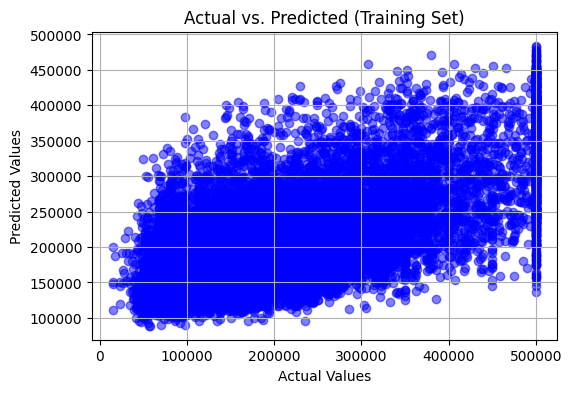

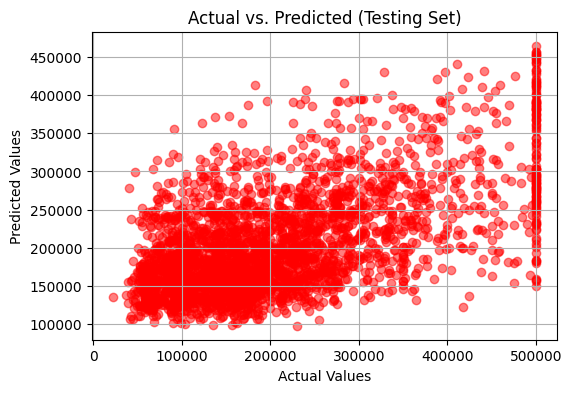

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate error metrics for training set
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate error metrics for testing set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print error metrics
print("Training Set Metrics:")
print("R2 Score:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("\nTesting Set Metrics:")
print("R2 Score:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

# Scatterplot of actual vs. predicted values for training set
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Scatterplot of actual vs. predicted values for testing set
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5)
plt.title('Actual vs. Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
